a. Read RGB file and display it

In [13]:
#importing libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import filters

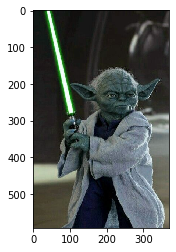

In [14]:
#reading image
img = cv2.imread ("yoda.jpg")
plt.imshow(img)
plt.show()

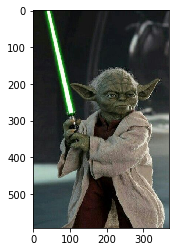

In [15]:
#convert BGR to RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

b. Conversion of RGB image into Labcolour system and display of each component (L,a,b) as a grey level image

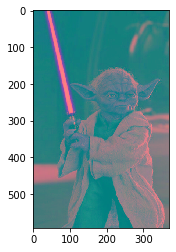

In [16]:
#convert RGB to Lab
lab_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2LAB)
plt.imshow(lab_img)
plt.show()

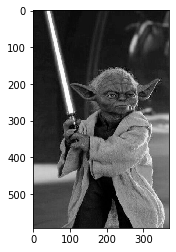

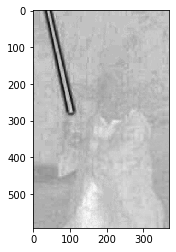

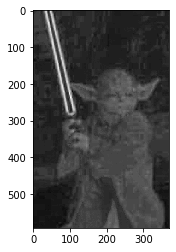

In [17]:
#split Lab into l, a and b components
L,a,b=cv2.split(lab_img)
plt.imshow(L, cmap = "gray")
plt.show()
plt.imshow(a, cmap = "gray")
plt.show()
plt.imshow(b, cmap = "gray")
plt.show()

c. Computation of the spatial derivatives using convolution by gaussian filter derivatives

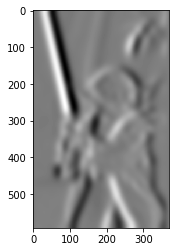

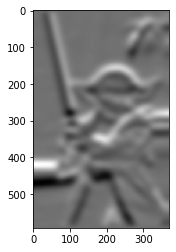

In [18]:
#Spatial derivatives using convolution by gaussian filter derivates
sigma = 10 #standard deviation
x_axis = np.zeros(L.shape)
x = filters.gaussian_filter(L, (sigma,sigma), (0,1), x_axis)
plt.imshow(x, cmap = "gray")
plt.show()

y_axis = np.zeros(L.shape)
y = filters.gaussian_filter(L, (sigma,sigma), (1,0), y_axis)
plt.imshow(y, cmap = "gray")
plt.show()

#blur level increases as standard deviation "sigma" increases

d. 2D histogram and surface plot computation with the chrominance component

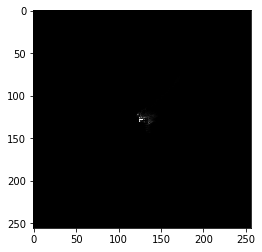

In [19]:
#compute 2D histogram
hist = cv2.calcHist([lab_img], [1,2], None, [256, 256], [0, 256, 0, 256])
plt.imshow(hist,interpolation = 'nearest', cmap = "gray")
plt.show()

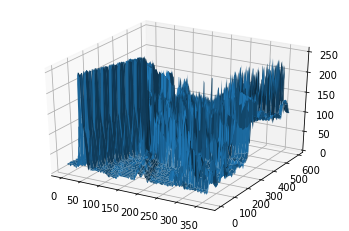

In [20]:
#compute 3D surface plot
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

y = range( lab_img.shape[0] )
x = range(lab_img.shape[1] ) 
X, Y = np.meshgrid(x, y)

ax.plot_surface( X, Y, lab_img[:,:,0] )

plt.show()

e. Backprojection computation using 2d histogram of a part of the image onto the target image

First Trial:

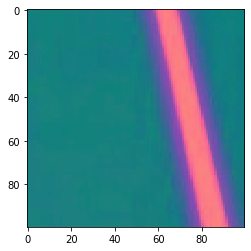

In [21]:
#using part of image to compute 2d histogram
yoda = lab_img[100:200, 0:100]
plt.imshow(yoda)
plt.show()

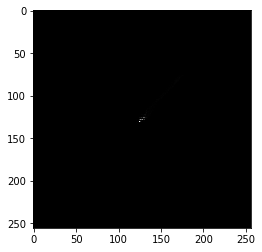

In [22]:
#plotting 2D histogram for the specific part of the image
hist1 = cv2.calcHist([yoda], [1,2], None, [256, 256], [0, 256, 0, 256])
plt.imshow(hist1,interpolation = 'nearest', cmap = "gray")
plt.show()

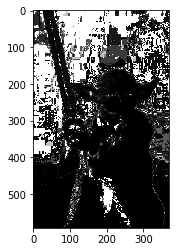

In [23]:
#Backprojection
mask = cv2.calcBackProject([lab_img], [1,2], hist1, [0, 256, 0, 256], 1)
plt.imshow(mask, cmap = "gray")
plt.show()

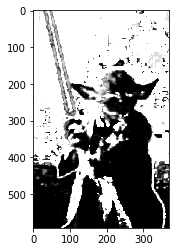

In [24]:
#using filter to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask = cv2.filter2D(mask, -1, kernel)
plt.imshow(mask, cmap = "gray")
plt.show()

Second Trial:

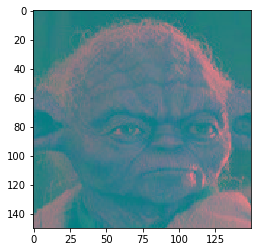

In [25]:
#using another part of image to compute 2d histogram
yoda1 = lab_img[150:300, 150:300]
plt.imshow(yoda1)
plt.show()

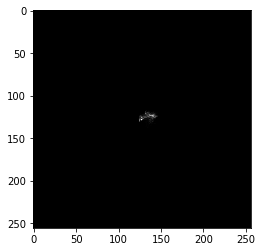

In [26]:
#plotting 2D histogram for the part of the image
hist2 = cv2.calcHist([yoda1], [1,2], None, [256, 256], [0, 256, 0, 256])
plt.imshow(hist2,interpolation = 'nearest', cmap = "gray")
plt.show()

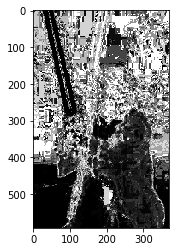

In [27]:
#Backprojection of the second cropped image
mask1 = cv2.calcBackProject([lab_img], [1,2], hist2, [0, 256, 0, 256], 1)
plt.imshow(mask1, cmap = "gray")
plt.show()

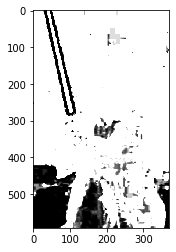

In [28]:
#using filter to remove noise
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask1 = cv2.filter2D(mask1, -1, kernel1)
plt.imshow(mask1, cmap = "gray")
plt.show()

Third Trial:

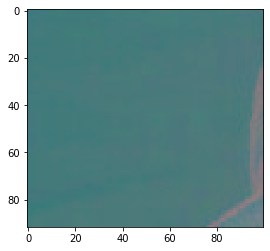

In [29]:
#using another part of image to compute 2d histogram
yoda2 = lab_img[500:600, 0:100]
plt.imshow(yoda2)
plt.show()

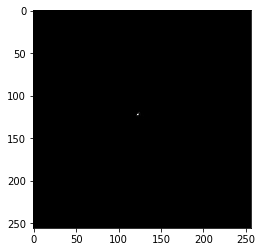

In [30]:
#plotting 2D histogram for the part of the image
hist3 = cv2.calcHist([yoda2], [1,2], None, [256, 256], [0, 256, 0, 256])
plt.imshow(hist3,interpolation = 'nearest', cmap = "gray")
plt.show()

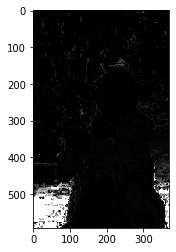

In [31]:
#Backprojection of the third cropped image
mask2 = cv2.calcBackProject([lab_img], [1,2], hist3, [0, 256, 0, 256], 1)
plt.imshow(mask2, cmap = "gray")
plt.show()

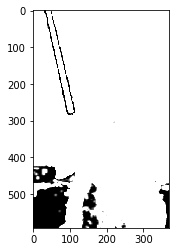

In [32]:
#using filter to remove noise
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask1 = cv2.filter2D(mask1, -1, kernel1)
plt.imshow(mask1, cmap = "gray")
plt.show()

f. Histogram equalization using 1D histogram using the luminance L

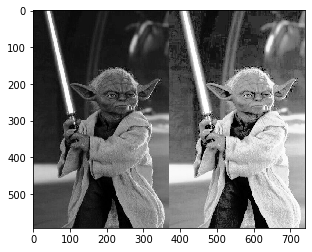

In [33]:
# creating a Histograms Equalization 
#Method 1:

equalizedHist = cv2.equalizeHist(L)

#stacking images side by side
actualVSequalized = np.hstack((L, equalizedHist))  
plt.imshow(actualVSequalized, cmap = "gray")
plt.show()

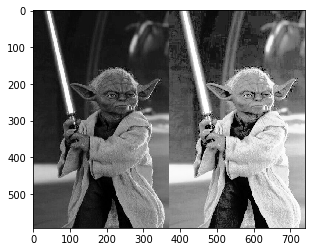

In [36]:
# creating a Histograms Equalization 
#Method 2:

def histeq(im,nbr_bins=256):

  imhist, bins = histogram(im.flatten(),nbr_bins)
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = 255 * cdf / cdf[-1] # normalize
  # use linear interpolation of cdf to find new pixel values
  im2 = interp(im.flatten(),bins[:-1],cdf)
  return im2.reshape(im.shape), cdf

from PIL import Image
from numpy import *
L1,cdf = histeq(L)

#stacking images side by side
actualVSequalized = np.hstack((L, L1))  
plt.imshow(actualVSequalized, cmap = "gray")
plt.show()


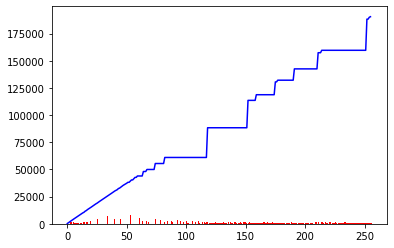

In [35]:
#plot histogram equalization
plt.hist(equalizedHist.flatten(),256,[0,256], color = 'r')
hist,bins = np.histogram(equalizedHist1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')

g. Evaluation of the performance of these techniques with histograms

Backprojection:
The shape of the histograms change with the selected cropped picture of the main image. From the First, Second and Third trials computed for backprojection, we observe that depending on the image selected, the target image changes post backprojection. The Second Trial shows the image is completely damaged as compared to the First Trial in which the pixels fit the distribution of pixels relatively better. The image with less chrominance components (Third Trial) is quite unable to recognize pixels in the original image upon backprojection. 



Histogram equalization:
Histogram equalization adjusts the pixel values in an image to enhance the contrast of the same as is clearly seen from the image. Using a gray scale image provides better output since each pixel in a grayscale image represents only one value — the intensity and the math gets simpler as only one value needs to be computed. 
Histogram equalization has been computed using both openCV and PIL and the outputs are the same. The original image and the high-contrast image have been stacked together for easy differentiation. 

Failed Case: The code given below uses a small image in a huge one colored background and applies histogram equalization. It is observed that while histogram equalization is applied to the image, the image bursts and the contrast is not increased as in the "yoda" image.

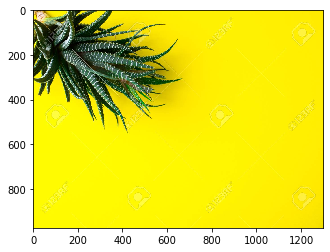

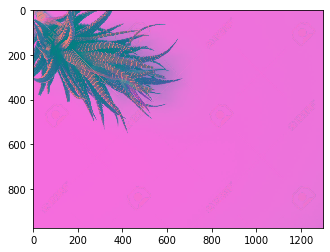

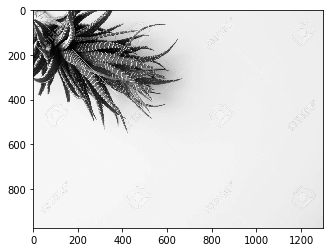

In [37]:
#read image
yellow = cv2.imread ("yellow.jpg")
#convert BGR to RGB
RGB_yellow = cv2.cvtColor(yellow, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_yellow)
plt.show()
#convert RGB to LAB
lab_yellow = cv2.cvtColor(RGB_yellow, cv2.COLOR_RGB2LAB)
plt.imshow(lab_yellow)
plt.show()
#split L,a,b components
L1,a1,b1=cv2.split(lab_yellow)
plt.imshow(L1, cmap = "gray")
plt.show()

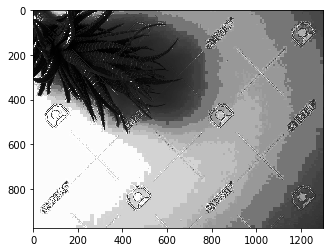

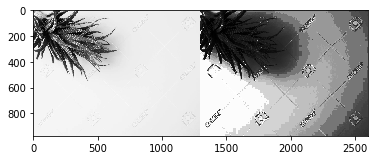

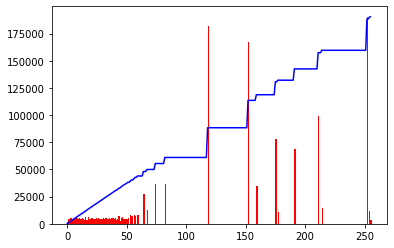

In [10]:
#apply Histogram Equalization
equalizedHist1 = cv2.equalizeHist(L1)
plt.imshow(equalizedHist1, cmap = "gray")
plt.show()

#stacking images side by side
actual1VSequalized1 = np.hstack((L1, equalizedHist1))  
plt.imshow(actual1VSequalized1, cmap = "gray")
plt.show()

#plot histogram
plt.hist(equalizedHist1.flatten(),256,[0,256], color = 'r')
hist,bins = np.histogram(equalizedHist1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')

References:

    [1]. "Programming Computer Vision with Python" by Jan Erik Solem
    [2]. http://www.ee.columbia.edu/ln/dvmm/publications/PhD_theses/jrsmith-thesis.pdf
    [3]. https://stackoverflow.com/questions/19099063/what-are-the-ranges-of-coordinates-in-the-cielab-color-space
    [4]. https://hub.packtpub.com/image-filtering-techniques-opencv/
    [5]. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
    [6]. https://www.oreilly.com/library/view/programming-computer-vision/9781449341916/ch01.html#examples_of_processing_images_with_pildo
    [7]. https://hackernoon.com/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23
    [8]. https://en.wikipedia.org/wiki/Histogram_equalization
    [9]. https://towardsdatascience.com/histogram-equalization-5d1013626e64#:~:targetText=Histogram%20Equalization%20is%20a%20computer,intensity%20range%20of%20the%20image.&targetText=This%20allows%20for%20areas%20of,to%20gain%20a%20higher%20contrast